In [102]:
% matplotlib inline
from __future__ import print_function

# Traitement de données classique

Nous allons voir dans cet exemple comment utiliser la bibliothèque `numpy` pour récupérer des valeurs dans un fichier csv et commencer à les traiter.
Nous allons utiliser le module `csv` qui permet de lire un fichier csv et d'en extraire les valeurs lignes par lignes.

Nous allons travailler sur le fichier de données d'entraînement du Titanic. Le but est de prédire les chance de survie à bord du bateau. Il faut récupérer le fichier `train.csv` (voir le premier cours ou téléchargez le depuis https://www.kaggle.com/c/titanic-gettingStarted/data ) et le sauvegarder dans le répertoire dans lequel le notebook s'éxecute. Vous pouvez utiliser la commande **`pwd`** pour connaître ce répertoire. Sinon, vous pouvez déplacer le répertoire courant pour rejoindre l'endroit où vous avez sauvegardé votre fichier avec la commande **`cd`**.

In [103]:
import csv
import numpy as np

fichier_csv = csv.reader(open('train.csv', 'r'))
entetes = fichier_csv.next()  # on récupère la première ligne qui contient les entetes
donnees = list()              # on crée la liste qui va servir à récupérer les données

for ligne in fichier_csv:     # pour chaque ligne lue dans le fichier csv
    donnees.append(ligne)     # on ajoute les valeurs lues dans le tableau donness
donnees = np.array(donnees)   # le tableau donnees est transformé en numpy array

Regardons comment sont stockées les données en mémoire:

In [104]:
print (donnees)

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


Regardons maintenant la colonne de l'âge, n'affichons que les 15 premières valeurs:

In [105]:
print (donnees[0:15, 5])

['22' '38' '26' '35' '35' '' '54' '2' '27' '14' '4' '58' '20' '39' '14']


On peut donc remarquer que les âges sont stockés comme des chaîne de caractères. Transformons les en réels :

In [106]:
age = donnees[0:15, 5].astype(np.float)

ValueError: could not convert string to float: 

Numpy ne sait pas convertir la chaîne de caractère vide `''` (en 6e position dans notre liste) en réels. Pour traiter ces données, il faudrait écrire un petit algorithme. Nous allons voir comment on peut utiliser `pandas` pour faire ces traitements beaucoup plus facilement.

# Traiter et manipuler les données avec `pandas`

In [107]:
import pandas as pd
import numpy as np

Pour lire le fichier csv nous allons utiliser la fonction **`read_csv`**

In [108]:
df = pd.read_csv('train.csv')

Pour vérifier si cela a bien fonctionné, affichons les premières valeurs. On voit apparaître l'identifiant du passager, s'il a survécu, sa classe, son nom, son sexe, son âge, le nombre de frères/soeurs/époux/épouse sur le bâteau, le nombre de parents ou d'enfants, le numéro de ticket, le prix, le numéro de cabine et le port d'embarquement. 

In [109]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Comparons le type de `donnees`, obtenu précédemment. C'est un numpy array. Le type de `df` est un objet spécifique à `pandas`.

In [110]:
type(donnees)

numpy.ndarray

In [111]:
type(df)

pandas.core.frame.DataFrame

Nous avions vu qu'avec `numpy`, toutes les valeurs importées étaient des chaînes de caractères. Vérifions ce qu'il en est avec `pandas`

In [112]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

On peut voir que `Pandas` a détecté automatiquement le types des données de notre fichier csv: soit des entiers, soit des réels, soit des objets (chaînes de caractères). Il y a deux commandes importantes à connaître, c'est **`df.info()`** et **`df.describe()`** 

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


L'âge n'est pas renseigné pour tous les passagers, seulement pour 714 passagers sur 891. Idem pour le numéro de cabine et le port d'embarquement. On peut également utiliser **`describe()`** pour calculer plusieurs indicateurs statistiques utiles.

In [114]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


On peut voir que `pandas` a calculé automatiquement les indicateurs statistiques en tenant compte uniquement des données renseignées. Par exemple, il a calculé la moyenne d'âge uniquement sur les 714 valeurs connues. `pandas` a laissé de coté les valeurs non-numériques (nom, sexe, ticket, cabine, port d'embarquement).

# Pour aller un peu plus loin avec pandas

## Référencement et filtrage

Pour afficher uniquement les 15 premières valeurs de la colonne âge :

In [115]:
df['Age'][0:15]

0     22
1     38
2     26
3     35
4     35
5    NaN
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
Name: Age, dtype: float64

On peut également utiliser la syntaxe

In [116]:
df.Age[0:15]

0     22
1     38
2     26
3     35
4     35
5    NaN
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
Name: Age, dtype: float64

On peut calculer des critères statistiques directement sur les colonnes

In [117]:
df.Age.mean()

29.69911764705882

On peut voir que c'est la même valeur que celle affichée dans **`describe`**. Cette syntaxe permet d'utiliser facilement la valeur de la moyenne dans des calculs ou des algorithmes.

Pour filtrer les données, on va passer la liste de colonnes désirées:

In [118]:
colonnes_interessantes = ['Sex', 'Pclass', 'Age']
df[ colonnes_interessantes ]

,Sex,Pclass,Age
0,male,3,22
1,female,1,38
2,female,3,26
3,female,1,35
4,male,3,35
5,male,3,NaN
6,male,1,54
7,male,3,2
8,female,3,27
9,female,2,14


En analyse, on est souvent intéressé  par filtrer les données en fonction de certains critères. Par exemple, l'âge maximum est 80 ans. On peut examiner les informations relatives aux personnes âgées :

In [119]:
df[df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


Comme on a trop d'informations, on peut les filtrer:

In [120]:
df[df['Age'] > 60][['Pclass', 'Sex', 'Age', 'Survived']]

,Pclass,Sex,Age,Survived
33,2,male,66.0,0
54,1,male,65.0,0
96,1,male,71.0,0
116,3,male,70.5,0
170,1,male,61.0,0
252,1,male,62.0,0
275,1,female,63.0,1
280,3,male,65.0,0
326,3,male,61.0,0
438,1,male,64.0,0


On peut voir que parmis les persones âges, il y a principalement des hommes. Les personnes qui   ont survécues était principalement des femmes. 

Nous allons maintenant voir comment traiter les valeurs manquantes pour l'âge. Nous allons filtrer les données pour afficher uniquement les valeurs manquantes

In [121]:
df[df.Age.isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


Pour combiner des filtres, on peut utiliser `'&'`. Affichons le nombre d'hommes dans chaque classe

In [122]:
for i in range(1, 4):
    print ("Dans la classe", i, ", il y a", len( df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]), "hommes")

Dans la classe 1 , il y a 122 hommes
Dans la classe 2 , il y a 108 hommes
Dans la classe 3 , il y a 347 hommes


Visualisons maintenant l'histogramme de répartition des âges.

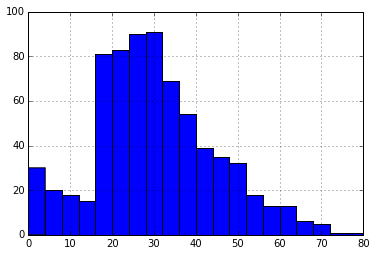

In [123]:
df.Age.hist(bins=20, range=(0,80))

# Créations et modifications des colonnes

Pour pouvoir exploiter les informations sur le sexe des personnes, nous allons ajouter une nouvelle colonne, appellée *genre*, qui vaudra 1 pour les hommes et 0 pour les femmes.

In [124]:
df['Gender'] = 4 # on ajoute une nouvelle colonne dans laquelle toutes les valeurs sont à 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4


In [125]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ) # la colonne Gender prend 0 pour les femmes et 1 pour les hommes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


Pour créer et renommer de nouvelles colonnes, on peut également agréger des informations issues de différentes colonnes. Créons par exemple une colonne pour stocker les nombre de personnes de la même famille à bord du Titanic.

In [126]:
df['FamilySize'] = df.SibSp + df.Parch
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0


Nous allons remplir les valeurs manquantes de l'âge avec la valeur médiane dépendant de la classe et du sexe.

In [127]:
ages_medians = np.zeros((2, 3))
ages_medians

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [128]:
for i in range(0,2):
    for j in range(0,3):
        ages_medians[i,j] = df[ (df['Gender'] == i) & (df['Pclass'] == j+1) ]['Age'].median()
        
ages_medians

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

On va créer une nouvelle colonne AgeFill qui va utiliser ces âges médians

In [129]:
for i in range(0, 2):
    for j in range (0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeFill'] = ages_medians[i,j]

# pour afficher les 10 premières valeurs qui sont complétées
df [df.Age.isnull()][['Gender', 'Pclass', 'Age', 'AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


Pour sauvegarder votre travail, vous pouvez utiliser le module `pickle` qui compresse et sauvegarde vos données :

In [130]:
import pickle

f = open('masauvegarde.pck', 'w')
pickle.dump(df, f)
f.close()

Pour récuperer votre travail, on utilise l'opération inverse, toujours avec `pickle`

In [131]:
with open('masauvegarde.pck', 'r') as f:
    dff = pickle.load(f)

# Retour à numpy pour l'apprentissage

Pour faire de l'apprentissage, et prédire la survie des passagers du Titanic, on peut utiliser [scikit-learn](http://scikit-learn.org). Ce dernier prend en entrée des données sous forme de *numpy array*, la conversion se fait simplement :

In [132]:
ex = df[ ['Gender', 'Pclass'] ] # on choisit seulement quelques features.
X = ex.as_matrix() # on convertit en numpy array
print(ex.head(5))
print(X[:5,:])

   Gender  Pclass
0       1       3
1       0       1
2       0       3
3       0       1
4       1       3
[[1 3]
 [0 1]
 [0 3]
 [0 1]
 [1 3]]


On cherche à prévoir la survie, on extrait donc l'information utile :

In [133]:
y = df['Survived'].as_matrix()
print (y[:5])

[0 1 1 1 0]


In [134]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

L'apprentissage du classifieur est fait, c'est-à-dire que nous avons entraîné une SVM sur nos données $X$ pour qu'elle soit capable de prédire la survie $y$. Pour vérifier que notre SVM a bien appris à prédire la survie des passagers, nous pouvons utiliser la méthode `predict()` et comparer visuellement pour les dix premières valeurs prédite par la SVM et la survie réelle des passagers.

In [135]:
print(clf.predict(X[:10,:]))
print (y[:10])

[0 1 1 1 0 0 0 0 1 1]
[0 1 1 1 0 0 0 0 1 1]


La SVM a bien appris à prédire ce que nous lui avons montré. Cela ne permet pas cependant d'évaluer sa capacité à généraliser à des cas qu'elle n'a pas vu. Pour ce faire, une approche classique est de faire de la [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e), c'est à dire qu'on entraîne le classifieur sur une partie des données et qu'on le teste sur une autre. Scikit-learn en donne une implémentation très simple d'utilisation.

In [136]:
from sklearn import cross_validation

scores = cross_validation.cross_val_score(clf, X, Y, cv=7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.04)


Sur les 7 partitions de nos données, la SVM prédit la survie des passagers dans 77% des cas, avec un écart-type de 0,04.

Pour améliorer les résultats, nous pouvons rajouter l'âge dans les features. Il faut cependant faire attention aux valeurs non-renseignées *NaN*, nous allons donc utiliser une nouvelle colonne AgeFilled avec l'âge ou la médiane.

In [137]:
df['AgeFilled'] = df.Age # on recopie la colonne Age
df.loc[df.AgeFilled.isnull(), 'AgeFilled'] = df[df.Age.isnull()]['AgeFill'] # on met l'age médian pour les valeurs non renseignées

Nous pouvons maintenant créer un nouveau $X$ incluant l'âge, en plus du sexe et de la classe, et vérifier si cela améliore les performances de la SVM. 

In [138]:
X = df[['Gender', 'Pclass', 'AgeFilled']].as_matrix()

scores = cross_validation.cross_val_score(svm.SVC(), X, Y, cv=7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.08)


Nous pouvons constater que les performances sont légèrement meilleures. Mais comme l'écart-type a également grandi, il n'est pas possible de conclure sur la significativité de cet apport. Il est facilement possible d'améliorer ce score de prédiction, n'hésitez pas à consulter la page [kaggle](https://www.kaggle.com/c/titanic-gettingStarted/) qui y est consacrée.

Ce notebook est une adaptation de celui proposé sur la page kaggle : https://www.kaggle.com/c/titanic-gettingStarted/details/getting-started-with-python-ii